In [2]:
%matplotlib inline

import xarray as xr
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_context('talk')

import warnings
warnings.simplefilter('ignore')

### Define path to data

In [2]:
path_025_hind = '/scratch/usr/shkifmmp/ORCA025/hindcast/yearly/'
path_025_ryf = '/scratch/usr/shkifmmp/ORCA025/RYF/yearly/'

path_05_hind1 = '/scratch/usr/shkifmmp/ORCA05/hind_1/yearly/' # LP01_cycle05
path_05_hind2 = '/scratch/usr/shkifmmp/ORCA05/hind_2/yearly/' #LP09_cycle05 

path_10_ryf = "/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly_EXP04/" # EXP 04
path_10_hind = "/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/" # EXP 03 

### Loading transport data from different nc files into one variable

In [11]:
data_025_hind = xr.open_mfdataset(paths = sorted(glob(path_025_hind + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
data_025_ryf = xr.open_mfdataset(paths = sorted(glob(path_025_ryf + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
data_05_hind1 = xr.open_mfdataset(paths = sorted(glob(path_05_hind1 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
data_05_hind2 = xr.open_mfdataset(paths = sorted(glob(path_05_hind2 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
data_10_ryf = xr.open_mfdataset(paths = sorted(glob(path_10_ryf + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
data_10_hind = xr.open_mfdataset(paths = sorted(glob(path_10_hind + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                 data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp

In [10]:
data_05_hind1

<xarray.DataArray 'vtrp' (time_counter: 61, y: 1, x: 1)>
dask.array<concatenate, shape=(61, 1, 1), dtype=float32, chunksize=(1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-07-01T17:00:00 ... 2018-...
Dimensions without coordinates: y, x
Attributes:
    units:             Sverdrup
    valid_min:         -500.0
    valid_max:         500.0
    long_name:         Volume_Transport
    short_name:        vtrp
    iweight:           1
    online_operation:  N/A
    axis:              T
    savelog10:         0.0

### Setting the time variable

In [12]:
time = pd.to_datetime((data_05_hind1['time_counter']).to_pandas())
time_10_ryf = pd.to_datetime((data_10_ryf['time_counter']).to_pandas()) #EXP04 goes until 1994
#time

In [5]:
len(time_0_ryf)

37

### Plotting time series 

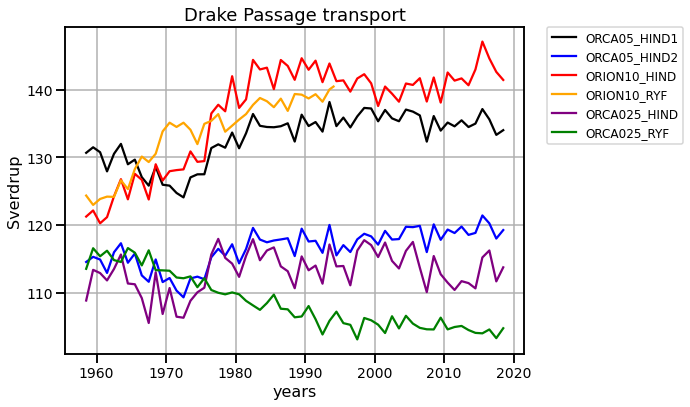

In [13]:
plt.plot(time, np.squeeze(np.array(data_05_hind1)), color='black', label='ORCA05_HIND1')
plt.plot(time, np.squeeze(np.array(data_05_hind2)), color='blue', label='ORCA05_HIND2')

plt.plot(time, np.squeeze(np.array(data_10_hind)), color='red', label='ORION10_HIND')
plt.plot(time_10_ryf, np.squeeze(np.array(data_10_ryf)), color='orange', label='ORION10_RYF')

plt.plot(time, np.squeeze(np.array(data_025_hind)), color='purple', label='ORCA025_HIND')
plt.plot(time, np.squeeze(np.array(data_025_ryf)), color='green', label='ORCA025_RYF')

plt.gca().set_xlabel("years", fontsize = 16)
plt.gca().set_ylabel("Sverdrup", fontsize = 16)
plt.gca().set_title("Drake Passage transport", fontsize = 18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().grid()
plt.gcf().set_size_inches(10, 6)
plt.gca().legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'transp_drake_20201024.pdf', format='PDF');

## ORCA O5 - 5 CYCLES

### Define path to data

In [3]:
path_lp01_01 = '/scratch/usr/shkifmmp/ORCA05/hind_1/cycles/01/yearly/'
path_lp01_02 = '/scratch/usr/shkifmmp/ORCA05/hind_1/cycles/02/yearly/'
path_lp01_03 = '/scratch/usr/shkifmmp/ORCA05/hind_1/cycles/03/yearly/'
path_lp01_04 = '/scratch/usr/shkifmmp/ORCA05/hind_1/cycles/04/yearly/'
path_lp01_05 = '/scratch/usr/shkifmmp/ORCA05/hind_1/yearly/' #LP01_cycle05 

path_lp09_01 = '/scratch/usr/shkifmmp/ORCA05/hind_2/cycles/01/yearly/'
path_lp09_02 = '/scratch/usr/shkifmmp/ORCA05/hind_2/cycles/02/yearly/'
path_lp09_03 = '/scratch/usr/shkifmmp/ORCA05/hind_2/cycles/03/yearly/'
path_lp09_04 = '/scratch/usr/shkifmmp/ORCA05/hind_2/cycles/04/yearly/'
path_lp09_05 = '/scratch/usr/shkifmmp/ORCA05/hind_2/yearly/' #LP09_cycle05 

### Loading transport data from different nc files into one variable

In [4]:
lp01_01 = xr.open_mfdataset(paths = sorted(glob(path_lp01_01 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp01_02 = xr.open_mfdataset(paths = sorted(glob(path_lp01_02 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp01_03 = xr.open_mfdataset(paths = sorted(glob(path_lp01_03 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp01_04 = xr.open_mfdataset(paths = sorted(glob(path_lp01_04 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp01_05 = xr.open_mfdataset(paths = sorted(glob(path_lp01_05 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp

lp09_01 = xr.open_mfdataset(paths = sorted(glob(path_lp09_01 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp09_02 = xr.open_mfdataset(paths = sorted(glob(path_lp09_02 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                 data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp09_03 = xr.open_mfdataset(paths = sorted(glob(path_lp09_03 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp09_04 = xr.open_mfdataset(paths = sorted(glob(path_lp09_04 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                 data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp
lp09_05 = xr.open_mfdataset(paths = sorted(glob(path_lp09_05 + 'OR*_transports.nc')), concat_dim = 'time_counter', 
                                  data_vars = 'minimal', coords = 'minimal', parallel = True).vtrp

### Setting the time variable

In [6]:
time = pd.to_datetime((lp01_01['time_counter']).to_pandas())
time2 = pd.to_datetime((lp01_02['time_counter']).to_pandas())

In [9]:
time

time_counter
1958-07-01 17:00:00   1958-07-01 17:00:00
1959-07-01 17:00:00   1959-07-01 17:00:00
1960-07-01 14:00:00   1960-07-01 14:00:00
1961-07-01 17:00:00   1961-07-01 17:00:00
1962-07-01 17:00:00   1962-07-01 17:00:00
                              ...        
2014-07-01 17:00:00   2014-07-01 17:00:00
2015-07-01 17:00:00   2015-07-01 17:00:00
2016-07-01 14:00:00   2016-07-01 14:00:00
2017-07-01 17:00:00   2017-07-01 17:00:00
2018-07-01 17:00:00   2018-07-01 17:00:00
Length: 61, dtype: datetime64[ns]

### Plotting time series 

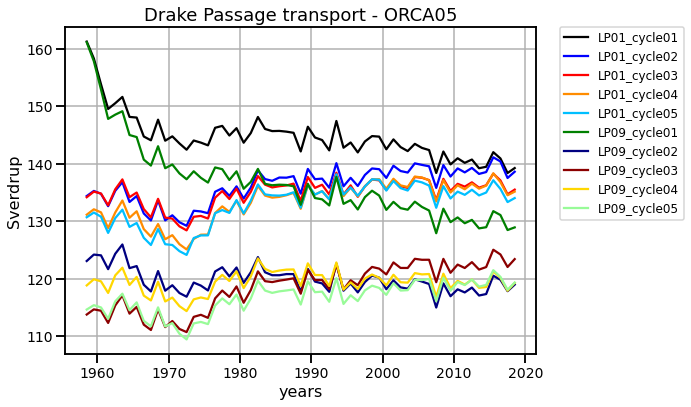

In [7]:
plt.plot(time, np.squeeze(np.array(lp01_01)), color='black', label='LP01_cycle01')
plt.plot(time, np.squeeze(np.array(lp01_02)), color='blue', label='LP01_cycle02')
plt.plot(time, np.squeeze(np.array(lp01_03)), color='red', label='LP01_cycle03')
plt.plot(time, np.squeeze(np.array(lp01_04)), color='darkorange', label='LP01_cycle04')
plt.plot(time, np.squeeze(np.array(lp01_05)), color='deepskyblue', label='LP01_cycle05')
plt.plot(time, np.squeeze(np.array(lp09_01)), color='green', label='LP09_cycle01')
plt.plot(time, np.squeeze(np.array(lp09_02)), color='navy', label='LP09_cycle02')
plt.plot(time, np.squeeze(np.array(lp09_03)), color='darkred', label='LP09_cycle03')
plt.plot(time, np.squeeze(np.array(lp09_04)), color='gold', label='LP09_cycle04')
plt.plot(time, np.squeeze(np.array(lp09_05)), color='palegreen', label='LP09_cycle05')

plt.gca().set_xlabel("years", fontsize = 16)
plt.gca().set_ylabel("Sverdrup", fontsize = 16)
plt.gca().set_title("Drake Passage transport - ORCA05", fontsize = 18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().grid()
plt.gcf().set_size_inches(10, 6)
plt.gca().legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
#plt.savefig(savepath + 'transp_drake_ORCA05.pdf', format='PDF');
plt.savefig(savepath + 'transp_drake_ORCA05.png', format='png', facecolor="w", dpi= 300) #setting facecolor=white to countor bug when saving, can also use pdf

In [59]:
61*5

305

### Concatenating cycles

In [50]:
lp01_conc = np.hstack((np.array(lp01_01.values).squeeze(), 
                       np.array(lp01_02.values).squeeze(), 
                       np.array(lp01_03.values).squeeze(),
                       np.array(lp01_04.values).squeeze(),
                       np.array(lp01_05.values).squeeze()))

In [51]:
lp09_conc = np.hstack((np.array(lp09_01.values).squeeze(), 
                       np.array(lp09_02.values).squeeze(), 
                       np.array(lp09_03.values).squeeze(),
                       np.array(lp09_04.values).squeeze(),
                       np.array(lp09_05.values).squeeze()))

In [54]:
len(lp09_conc)

305

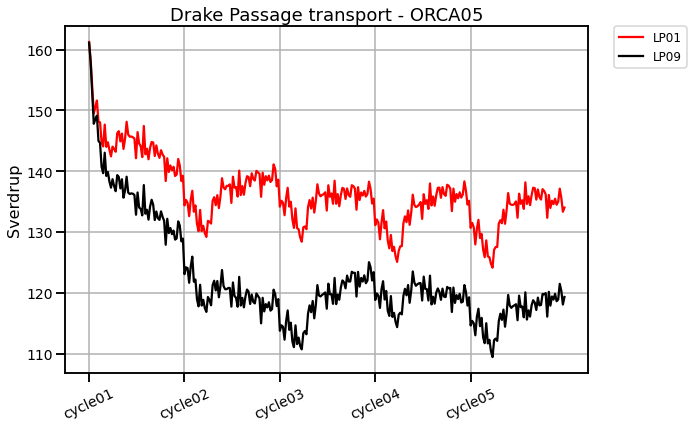

In [69]:
plt.plot(lp01_conc, color='red', label='LP01')
plt.plot(lp09_conc, color='black', label='LP09')

#plt.gca().set_xlabel("years", fontsize = 16)
plt.gca().set_ylabel("Sverdrup", fontsize = 16)
plt.gca().set_title("Drake Passage transport - ORCA05", fontsize = 18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().grid()
plt.gcf().set_size_inches(10, 6)
plt.gca().legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.tight_layout()

locs, labels = plt.xticks()
plt.xticks(np.arange(0, 305, step=61), ('cycle01', 'cycle02', 'cycle03', 'cycle04', 'cycle05'), rotation=25)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'transp_drake_ORCA05_conc.png', format='png', facecolor="w", dpi= 300) #setting facecolor=white to countor bug when saving, can also use pdf